A histogram is a visual representation of distribution of a continous feature. For images we can display the frequency of values for colors. Each of 3 RGB channels has values between 0-255. We can plot these as 3 histograms on top of each other too see how much of each channel there is...

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dark_horse = cv2.imread('horse.jpg')  # original BGR 
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)  # converted to RGB for show

rainbow = cv2.imread('rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)


In [4]:
hist_values = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256], ranges=[0,256])

In [5]:
hist_values.shape

(256, 1)

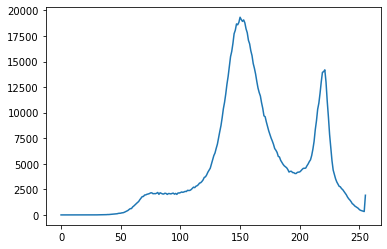

In [6]:
plt.plot(hist_values)

In [7]:
hist_values = cv2.calcHist([dark_horse], channels=[0], mask=None, histSize=[256], ranges=[0,256])


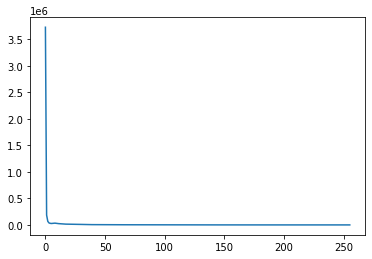

In [8]:
plt.plot(hist_values)

In [9]:
img = blue_bricks

Text(0.5, 1.0, 'HISTOGRAM FOR BLUE BRICKS')

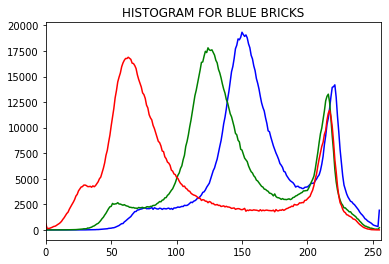

In [11]:
color = ('b', 'g', 'r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None, [256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])

plt.title('HISTOGRAM FOR BLUE BRICKS')

Text(0.5, 1.0, 'HISTOGRAM FOR HORSE')

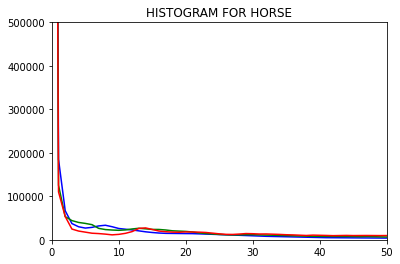

In [13]:
img = dark_horse

color = ('b', 'g', 'r')

for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None, [256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,50])
    plt.ylim([0,500000])

plt.title('HISTOGRAM FOR HORSE')

<h2>HISTOGRAM EQUALIZATION</h2><BR> We can select an ROI and only calculate color histogram of that masked section. <br> Histogram equalization is a method of contrast adjustment based on image's histogram. applying histogram equalization will reduce color depth  ...   

In [14]:
rainbow = cv2.imread('rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

In [15]:
img = rainbow

In [16]:
img.shape

(550, 413, 3)

In [17]:
mask = np.zeros(img.shape[:2], np.uint8)

In [18]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

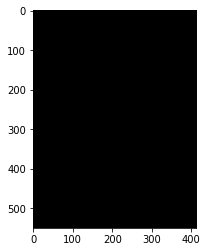

In [20]:
plt.imshow(mask, cmap='gray')

In [21]:
mask[300:400, 100:400] = 255

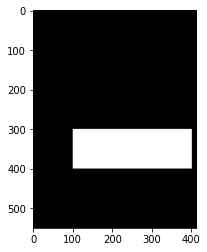

In [22]:
plt.imshow(mask, cmap='gray')

In [23]:
masked_img = cv2.bitwise_and(img, img, mask=mask)

In [24]:
show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask=mask)

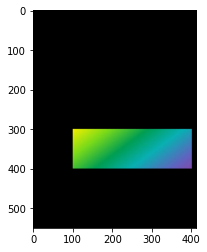

In [25]:
plt.imshow(show_masked_img)

In [27]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2], mask=mask, histSize=[256],ranges=[0,256])

In [28]:
hist_values_red = cv2.calcHist([rainbow],channels=[2], mask=None, histSize=[256],ranges=[0,256])


Text(0.5, 1.0, 'RED HISTOGRAM FOR MASKED RAINBOW')

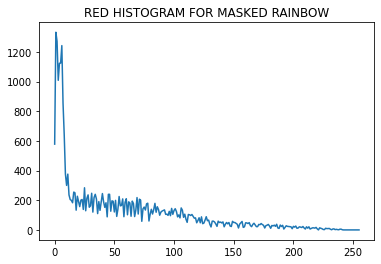

In [29]:
plt.plot(hist_mask_values_red)
plt.title("RED HISTOGRAM FOR MASKED RAINBOW")

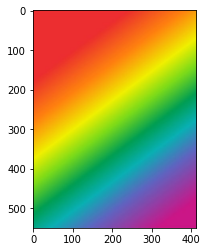

In [30]:
plt.imshow(show_rainbow)

Text(0.5, 1.0, 'RED HISTOGRAM FOR NORMAL RAINBOW')

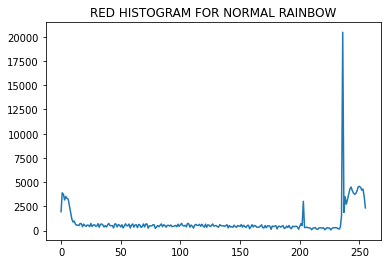

In [31]:
plt.plot(hist_values_red)
plt.title("RED HISTOGRAM FOR NORMAL RAINBOW")

<h2>HISTOGRAM EQUALIZATION STARTS BELOW</H2>

In [38]:
gorilla = cv2.imread('gorilla.jpg', 0) # 0 means uploaded as grayscale

In [39]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

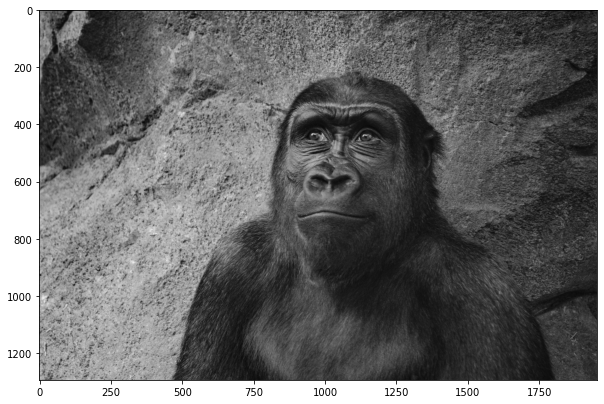

In [40]:
display(gorilla, cmap='gray')

In [42]:
hist_values = cv2.calcHist([gorilla], channels=[0], mask=None, histSize=[256], ranges= [0,256])

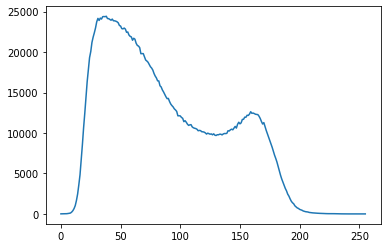

In [43]:
plt.plot(hist_values)

In [44]:
eq_gorilla = cv2.equalizeHist(gorilla)

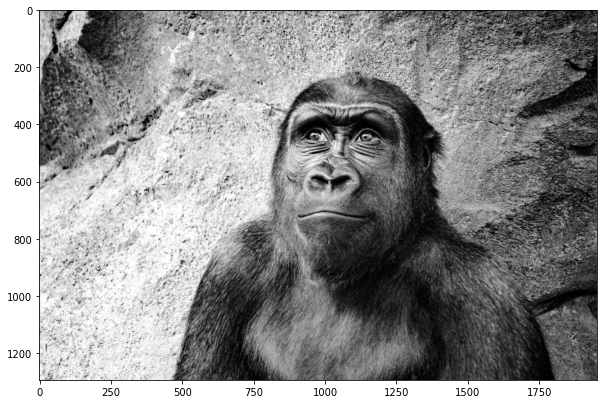

In [46]:
display(eq_gorilla, cmap='gray')

In [47]:
hist_values = cv2.calcHist([eq_gorilla], channels=[0], mask=None, histSize=[256], ranges= [0,256])


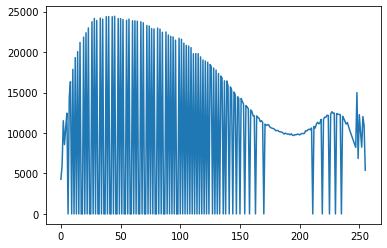

In [48]:
plt.plot(hist_values)

In [49]:
color_gorilla = cv2.imread('gorilla.jpg')

In [50]:
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)

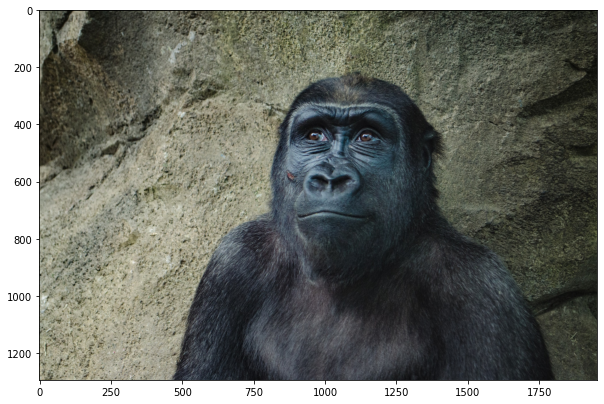

In [51]:
display(show_gorilla)

In [52]:
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

In [53]:
hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 198, 185, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [174, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [54]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

In [55]:
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

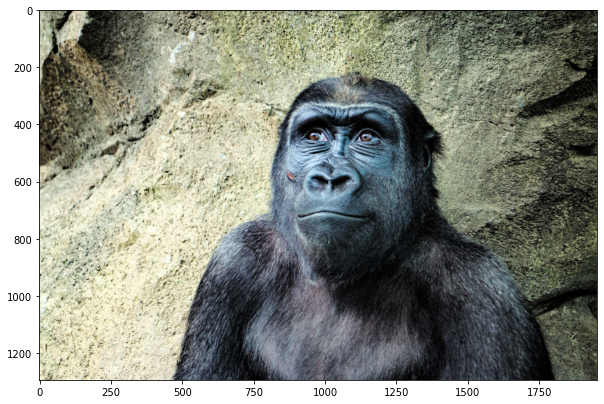

In [56]:
display(eq_color_gorilla)